# Split-Apply-Combine applied

In [1]:
import pandas as pd 

In [2]:
summer = pd.read_csv("../data/summer.csv")

In [3]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


資料集.count() 可以計算出不是NaN的值有幾個。

In [5]:
summer.count()
# 所以Country有NaN

Year          31165
City          31165
Sport         31165
Discipline    31165
Athlete       31165
Country       31161
Gender        31165
Event         31165
Medal         31165
dtype: int64

In [6]:
medal_per_country = summer.groupby("Country").Medal.count()
medal_per_country

Country
AFG       2
AHO       1
ALG      15
ANZ      29
ARG     259
ARM      11
AUS    1189
AUT     146
AZE      26
BAH      27
BAR       1
BDI       1
BEL     411
BER       1
BLR     113
BOH       7
BOT       1
BRA     431
BRN       1
BUL     333
BWI       5
CAN     649
CHI      33
CHN     807
CIV       1
CMR      23
COL      19
CRC       4
CRO     114
CUB     410
       ... 
SUD       1
SUI     380
SUR       2
SVK      34
SWE    1044
SYR       3
TAN       2
TCH     329
TGA       1
THA      25
TJK       3
TOG       1
TPE      44
TRI      20
TTO      10
TUN      10
TUR      86
UAE       1
UGA       7
UKR     173
URS    2049
URU      76
USA    4585
UZB      20
VEN      12
VIE       2
YUG     435
ZAM       2
ZIM      23
ZZX      48
Name: Medal, Length: 147, dtype: int64

統計完會發現不實用，因為會想要拿出獎牌拿較多的前幾名的國家。

In [7]:
medal_per_country.nlargest(n=20)

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

如果想要完整的排序結果，利用 資料集.sort()

In [8]:
medal_per_country.sort_values(ascending=False)

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
FRG     490
FIN     456
ESP     442
YUG     435
BRA     431
BEL     411
CUB     410
SUI     380
BUL     333
TCH     329
       ... 
TAN       2
LUX       2
KUW       2
VIE       2
ZAM       2
ECU       2
TGA       1
TOG       1
UAE       1
BAR       1
BDI       1
AHO       1
BER       1
SUD       1
ERI       1
BOT       1
SEN       1
GAB       1
NIG       1
MRI       1
MKD       1
CIV       1
ISV       1
IRQ       1
CYP       1
GUY       1
GUA       1
DJI       1
GRN       1
BRN       1
Name: Medal, Length: 147, dtype: int64

---
## 繪圖

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [11]:
plt.style.use("seaborn")

In [12]:
medal_per_country = summer.groupby("Country").Medal.count().nlargest(n = 20)

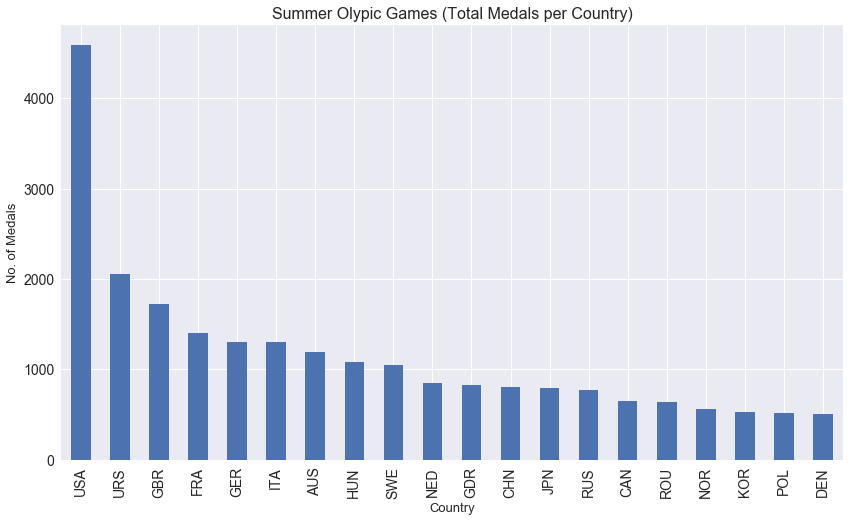

In [13]:
medal_per_country.plot(kind = "bar", figsize = (14,8), fontsize = 14)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("No. of Medals", fontsize = 13)
plt.title("Summer Olypic Games (Total Medals per Country)", fontsize = 16)
plt.show()

沒辦法像影片那樣有各式各樣的顏色，除非我手動調整。

---
## 小結論
快速視覺化是必備技能，在GroupBy之後，除了自己簡單的觀察，也要準備可以表達出自己見解的圖片。

---
換titanic.csv

In [14]:
titanic = pd.read_csv("../data/titanic_ver01.csv")

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin
0,1,0,3,male,22.0,1,0,7.2500,S,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,NaN


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Cabin          204 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [17]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic.Fare.mean()

32.204207968574636

In [19]:
titanic.groupby("Pclass").Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

可以知道不同等艙的票價確實不同，平均值為多少。

In [20]:
titanic.Survived.sum()
# 342是總共存活的人。

342

In [21]:
titanic.Survived.mean()
# 平均存活率

0.3838383838383838

但是歷史上記載，電影也告訴我們  
當時救生艇會先讓女生以及小孩先上船  
所以我們可以用資料來驗證是某有這一件事情。

In [22]:
titanic.groupby("Sex").Survived.mean()
# 女性存活率比較高

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [23]:
titanic.groupby("Pclass").Survived.mean()
# 票價比較高的船艙，存活率比較高。
# 記得存活率要和overall的存活率比。

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [24]:
titanic["ad_chi"] = "adult"
# 新增一欄ad_chi，先填滿 adult 

In [25]:
titanic.loc[titanic.Age < 18, "ad_chi"] = "child"

In [26]:
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,ad_chi
0,1,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,2,1,1,female,38.0,1,0,71.2833,C,C,adult
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,4,1,1,female,35.0,1,0,53.1000,S,C,adult
4,5,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,6,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,7,0,1,male,54.0,0,0,51.8625,S,E,adult
7,8,0,3,male,2.0,3,1,21.0750,S,NaN,child
8,9,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,10,1,2,female,14.0,1,0,30.0708,C,NaN,child


In [27]:
# titanic.ad_chi.count()
# 計算該欄位有幾個非空的值。
# 
titanic.ad_chi.value_counts()
# 計算該欄位的類別，該類別下有幾個。

adult    778
child    113
Name: ad_chi, dtype: int64

In [28]:
titanic.groupby("ad_chi").Survived.mean()
# 可以看出確實小孩的存活率比較高。

ad_chi
adult    0.361183
child    0.539823
Name: Survived, dtype: float64

---
## 用 Sex, ad_chi 去切割資料集

In [29]:
titanic.groupby(["Sex", "ad_chi"]).Survived.count()
# 可以看到分組條件下，存活的數量

Sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: Survived, dtype: int64

In [30]:
titanic.groupby(["Sex", "ad_chi"]).Survived.mean().sort_values(ascending = False)

Sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: Survived, dtype: float64

到此就可以看出，女生成人的存活率最高，接著是女生小孩，男生小孩，最後才是男生成人。

In [31]:
w_and_c_first = titanic.groupby(["Sex", "ad_chi"]).Survived.mean().sort_values(ascending = False)

Text(0.5, 1.0, 'Titanic Survival Rate by Sex/Age-Groups')

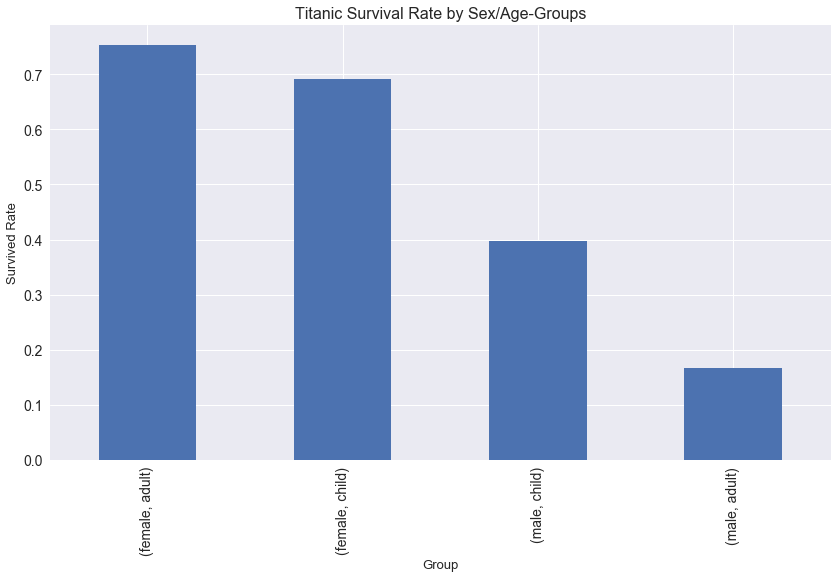

In [32]:
w_and_c_first.plot(kind = "bar", figsize = (14,8), fontsize = 14)
# plt.xticks(fontsize = 15) #使用plt.xticks設置x軸刻度
# plt.yticks(fontsize = 1s3) #使用plt.yticks設置y軸刻度
plt.xlabel("Group", fontsize = 13)
plt.ylabel("Survived Rate", fontsize = 13)
plt.title("Titanic Survival Rate by Sex/Age-Groups", fontsize = 16)

---
## 一次求取很多的aggregation function

In [33]:
titanic.groupby("Sex")[["Survived", "Pclass", "Age", "Fare"]].agg(["sum", "mean"])

Survived           Pclass                 Age                   Fare  \
            sum      mean    sum      mean       sum       mean         sum   
Sex                                                                           
female      233  0.742038    678  2.159236   7286.00  27.915709  13966.6628   
male        109  0.188908   1379  2.389948  13919.17  30.726645  14727.2865   

                   
             mean  
Sex                
female  44.479818  
male    25.523893

所以性別分組底下，有多少人活，有多少人死，比例為何。  
而且總共來說來男生花的錢比女生多，但是平均來看，女生花的船票錢比較多。

---
稍微來了解一下這樣的格式

In [34]:
l = titanic.groupby("Sex")[["Survived", "Pclass", "Age", "Fare"]]

In [35]:
split1 = list(l)
split1

[('female',
       PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
  1              2         1       1  female  38.0      1      0   71.2833   
  2              3         1       3  female  26.0      0      0    7.9250   
  3              4         1       1  female  35.0      1      0   53.1000   
  8              9         1       3  female  27.0      0      2   11.1333   
  9             10         1       2  female  14.0      1      0   30.0708   
  10            11         1       3  female   4.0      1      1   16.7000   
  11            12         1       1  female  58.0      0      0   26.5500   
  14            15         0       3  female  14.0      0      0    7.8542   
  15            16         1       2  female  55.0      0      0   16.0000   
  18            19         0       3  female  31.0      1      0   18.0000   
  19            20         1       3  female   NaN      0      0    7.2250   
  22            23         1       3  female  15.0  

In [36]:
type(split1)

list

In [37]:
type(split1[0])

tuple

In [38]:
type(split1[0][1])

pandas.core.frame.DataFrame

In [39]:
split1[0][1].columns
# 超級怪，發現根本沒有挑選欄位!!
# 所以這個步驟要小心

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Cabin', 'ad_chi'],
      dtype='object')

In [40]:
split1[0][0]

'female'

In [41]:
split1[0][1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,ad_chi
1,2,1,1,female,38.0,1,0,71.2833,C,C,adult
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,4,1,1,female,35.0,1,0,53.1000,S,C,adult
8,9,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,10,1,2,female,14.0,1,0,30.0708,C,NaN,child
10,11,1,3,female,4.0,1,1,16.7000,S,G,child
11,12,1,1,female,58.0,0,0,26.5500,S,C,adult
14,15,0,3,female,14.0,0,0,7.8542,S,NaN,child
15,16,1,2,female,55.0,0,0,16.0000,S,NaN,adult
18,19,0,3,female,31.0,1,0,18.0000,S,NaN,adult


In [42]:
split1[0][1][["Survived", "Pclass", "Age", "Fare"]].agg(["sum", "mean"])
# 所以這邊就可以看到 female 底下，挑選出了欄位，的aggregation function結果。

,Survived,Pclass,Age,Fare
sum,233.000000,678.000000,7286.000000,13966.662800
mean,0.742038,2.159236,27.915709,44.479818
